# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# get zip file into colab
car_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [0]:
# inspect data in raw format. headers are not showing up at all
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

In [0]:
# import pandas library
import pandas as pd
import numpy as np

In [0]:
# check to make sure url for data was properly assigned a variable
car_data_url

'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [0]:
# read url into a data frame
car_data = pd.read_csv(car_data_url)

In [0]:
# check shape of data frame to see if it matches description from the source site
# it's close; our df has 1 less row, but one more column; missing column is "class values"
# assuming this is typical of UCI data
# will likely need to manually create headers
car_data.shape

(1727, 7)

In [0]:
# create column headers for future use
column_headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_values']

In [0]:
# read car_data into a new data frame with column headers
df = pd.read_csv(car_data_url, header=None, names=column_headers)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
# view last 5 rows; they don't appear to be out of order, but i'm not sure
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [0]:
# assess new shape to see if it matches UCI data description
# and yes, it now matches the number of columns headers/attributes
df.shape

In [0]:
# UCI indicates that this data set has no missing values
df.isnull().sum()

In [0]:
# get summary statistics of the data
df.describe()

In [0]:
# summary statistics of non numerical data
df.describe(exclude='number')

,buying,maint,doors,persons,lug_boot,safety,class_values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 
- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 


In [0]:
# assign data to a variable called iris_data
iris_data = pd.read_csv('iris.data')

In [0]:
# preview the new data frame
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
# headers are not showing up properly
# manually create new column headers
iris_column = ['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)', 'class']

In [0]:
# add new column headers to iris.data data frame
iris_data = pd.read_csv('iris.data', header = None, names=iris_column)
iris_data.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# check iris.data df shape for correct number of rows and columns
# it matches UCI data description
iris_data.shape

(150, 5)

In [0]:
# check first five rows
iris_data.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# check last five rows
iris_data.tail()


,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# check for missing values
# confirms UCI website saying there are no missing values
iris_data.isnull().sum()

sepal_length(cm)    0
sepal_width(cm)     0
petal_length(cm)    0
petal_width(cm)     0
class               0
dtype: int64

In [0]:
# general summary statistics of data set
iris_data.describe()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
# summary statistics of non numerical data
iris_data.describe(exclude='number')

,class
count,150
unique,3
top,Iris-versicolor
freq,50


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# I'll be using the cars data set
# ??are all these variable technically categorical data??
# ?? doors and persons can only fall into 1 of 3 or 4 variables respectively
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
# look at all categorical variables
df[['buying', 'maint', 'lug_boot', 'safety', 'class_values']].tail()

,buying,maint,lug_boot,safety,class_values
1723,low,low,med,med,good
1724,low,low,med,high,vgood
1725,low,low,big,low,unacc
1726,low,low,big,med,good
1727,low,low,big,high,vgood


In [0]:
# show a cross tab to see relationship between 'buying' cost of car and 'class_values'
pd.crosstab(df['buying'], df['class_values'])

class_values,acc,good,unacc,vgood
buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


In [0]:
## these perfectly uiformed numbers look questionable
pd.crosstab(df['doors'], df['safety'])

safety,high,low,med
doors,,,
2,144,144,144
3,144,144,144
4,144,144,144
5more,144,144,144


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

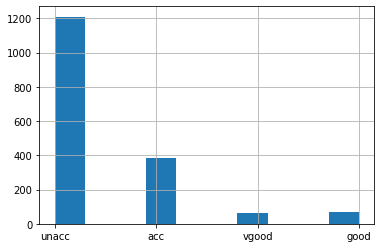

In [0]:
# view distribution of class values using a histogram
df['class_values'].hist(bins=10);

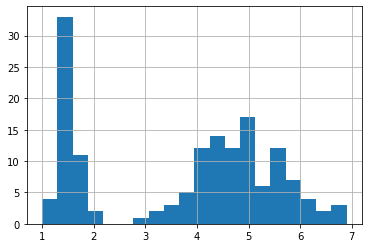

In [0]:
# curious what one iris data variable histogram distribution will look like
iris_data['petal_length(cm)'].hist(bins=20);


In [0]:
# view distribution of buying x lug_boot column values using scatter plot
# ideal for time series numerical data, but still trying
# shows expected error because this data set column values all appear to be categorical, not numerical
df.plot.scatter('doors', 'persons')

ValueError: ignored

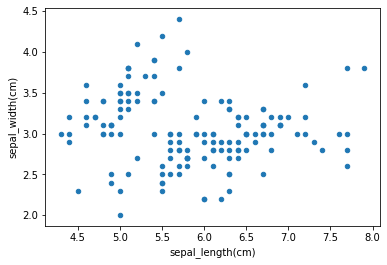

In [0]:
# trying a scatter plot using the second data set, iris.data
iris_data.plot.scatter('sepal_length(cm)', 'sepal_width(cm)');

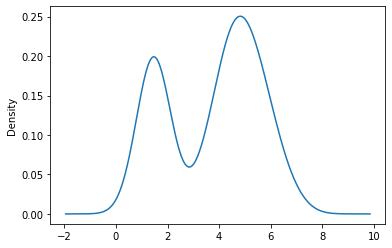

In [0]:
# density plot of the petal lenght because I used in histogram above, so comparison
# also because car_data values are mostly non-numerical
iris_data['petal_length(cm)'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
# plot a cross tab of 
pd.crosstab(df['buying'], df['class_values'])

In [0]:
# turn into a plot 
results = pd.crosstab(df['buying'], df['class_values'])

In [0]:
results.plot(kind='bar');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
import seaborn as sns

In [0]:
# practice exploring other data sets datasets 
forest = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

In [0]:
# glance at data set and column headers
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [0]:
sns.set(style='ticks')

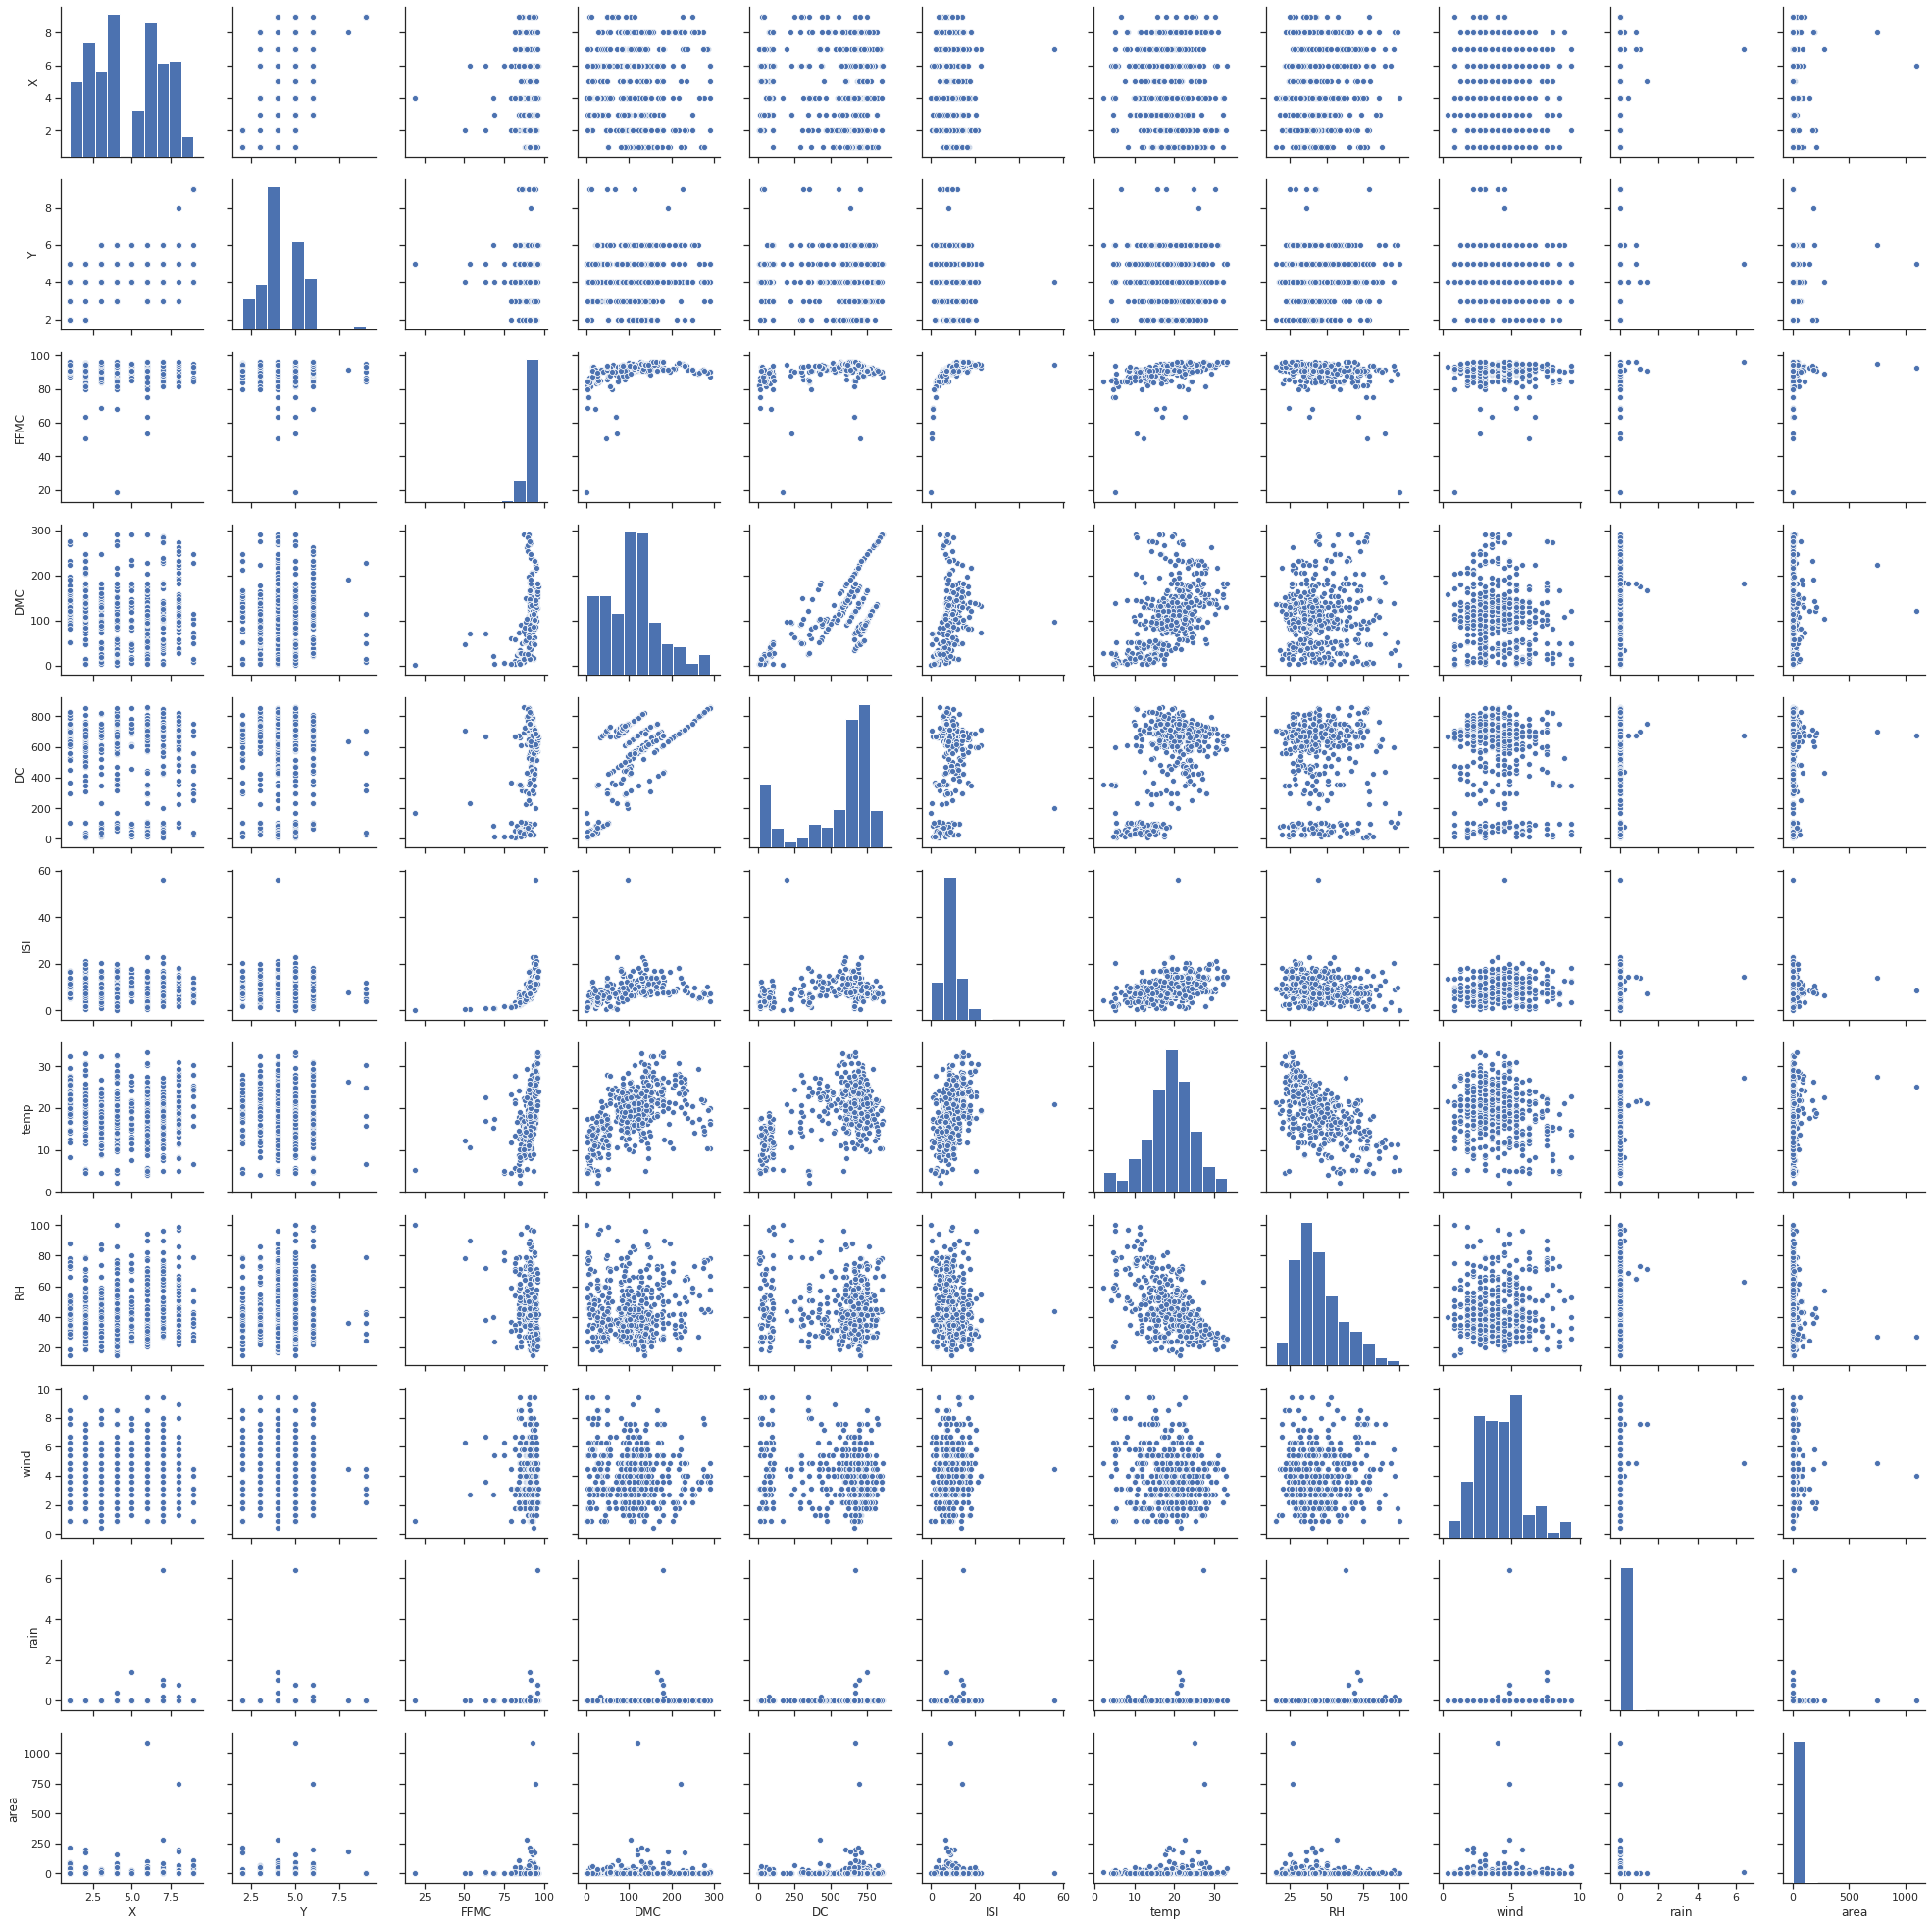

In [0]:
# explore all the possible 
sns.pairplot(forest)


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


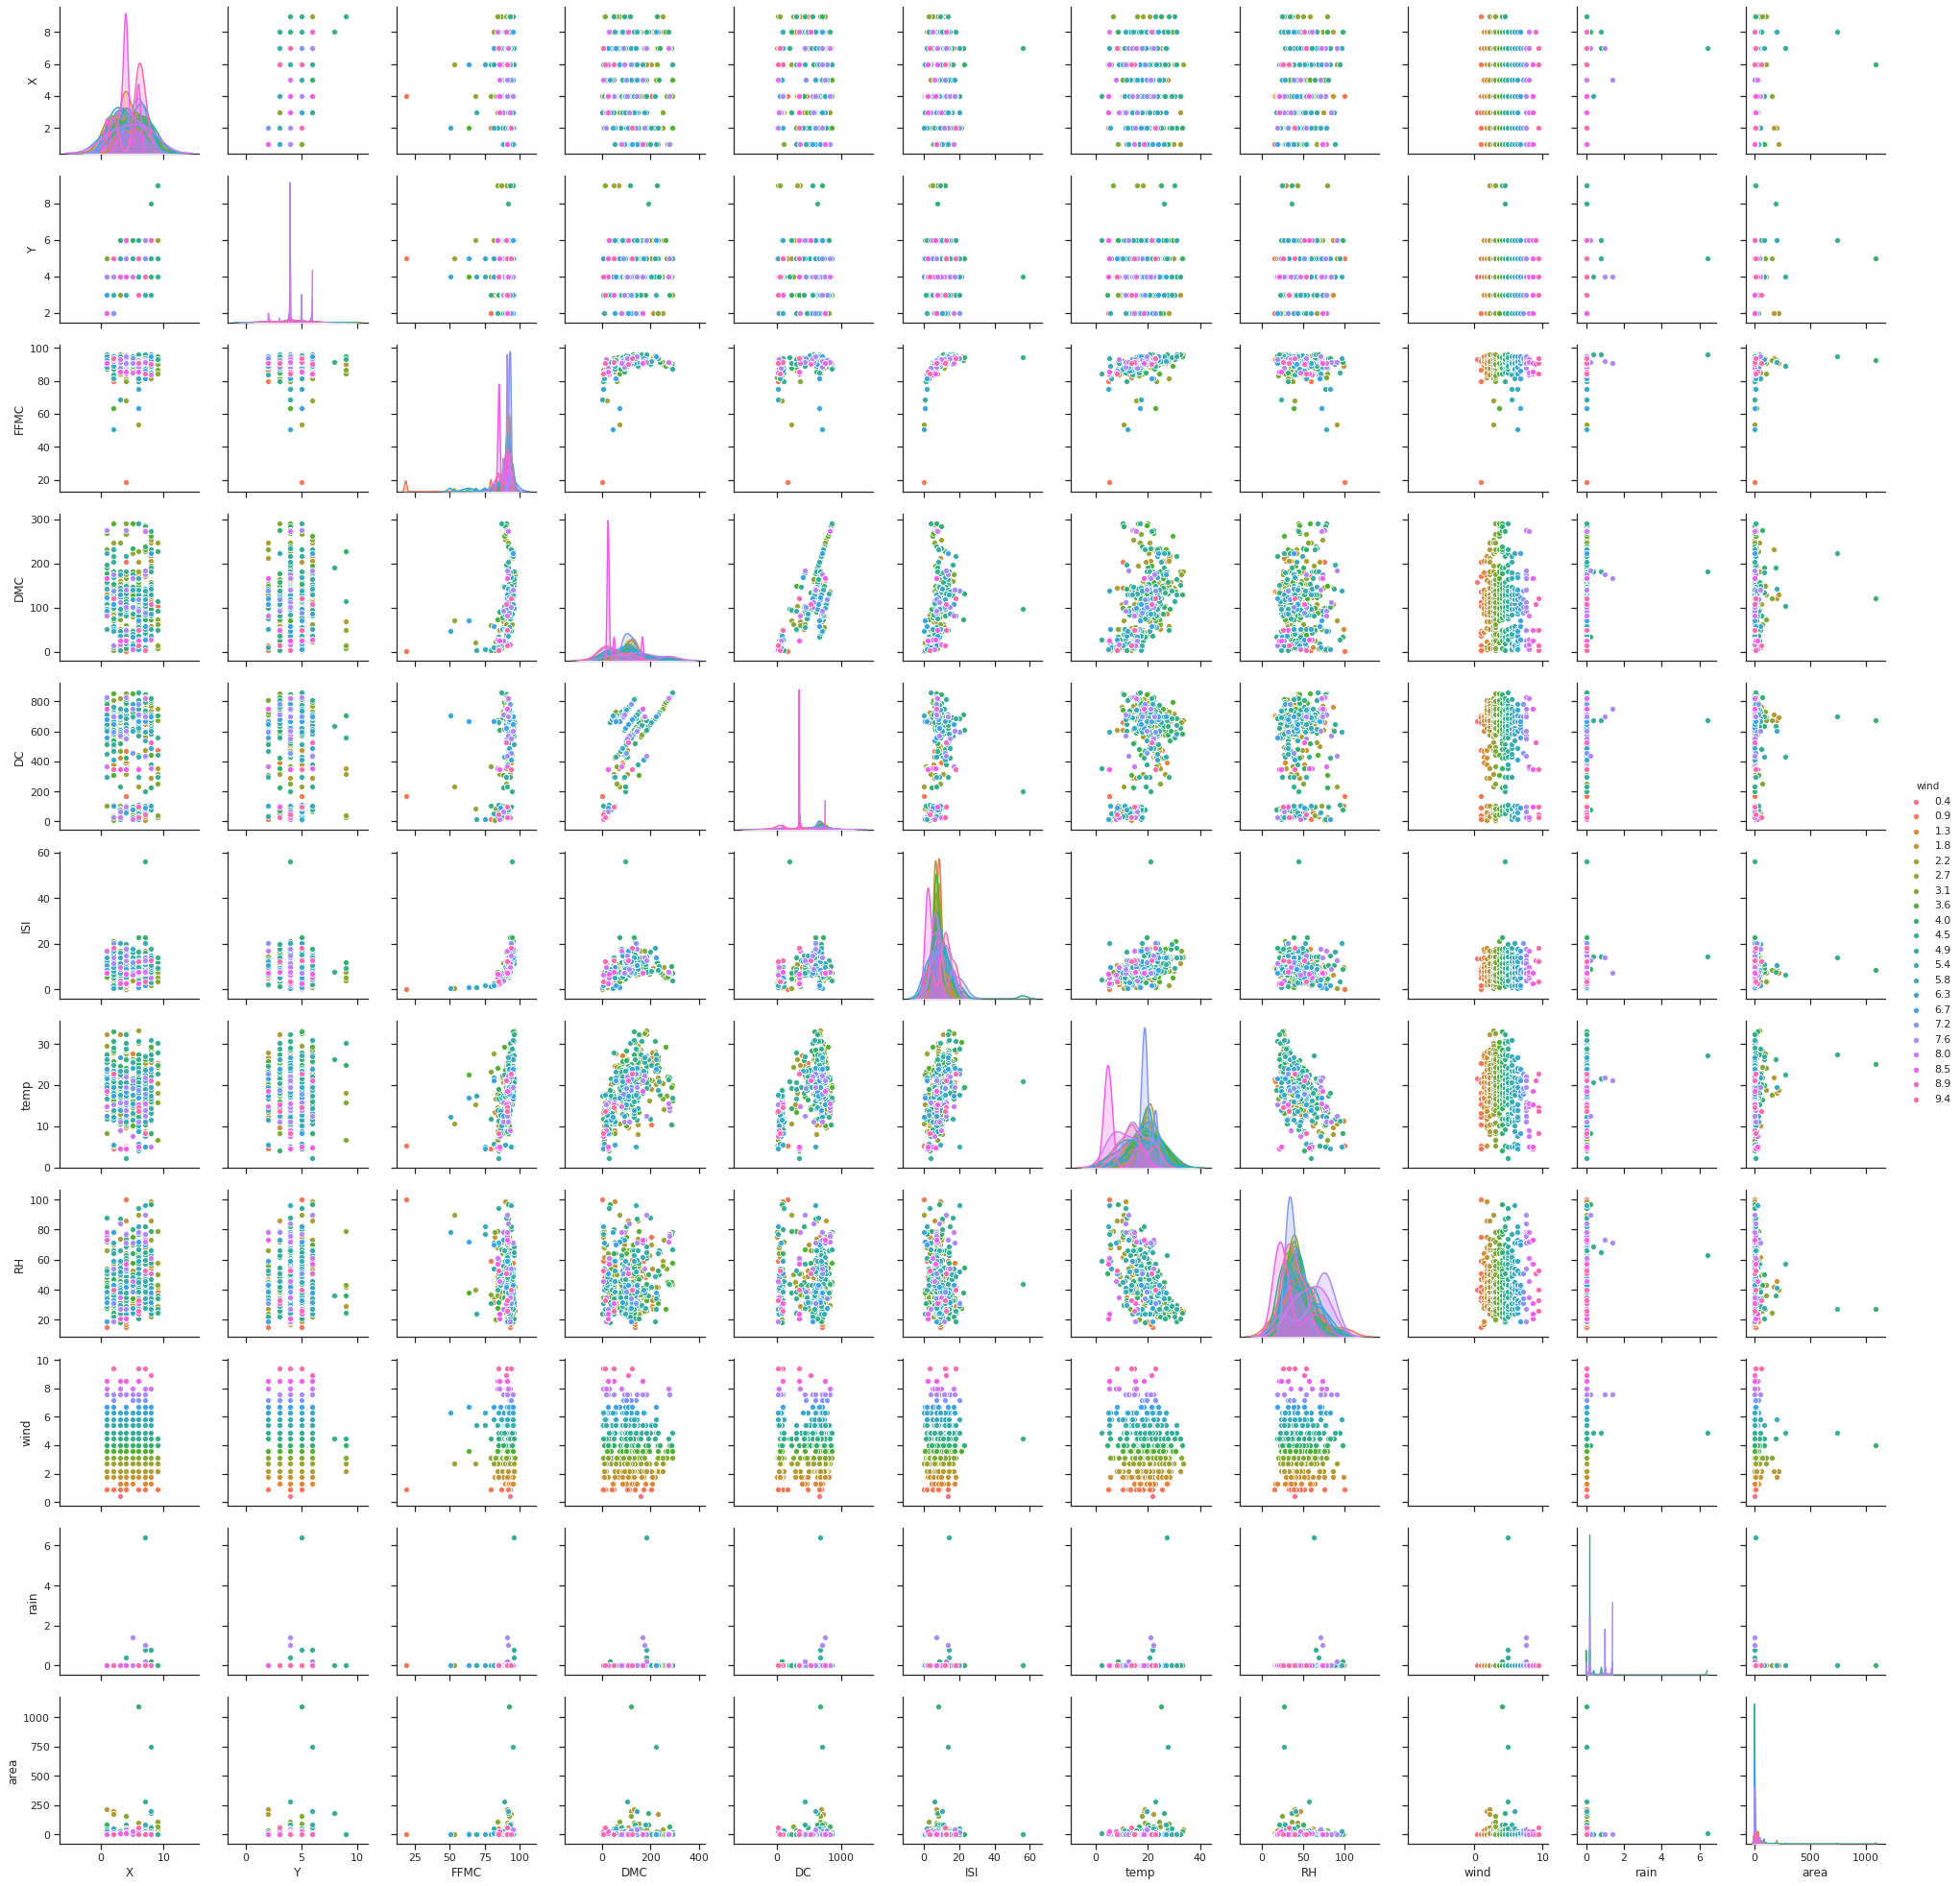

In [0]:
sns.pairplot(forest,hue='wind');

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


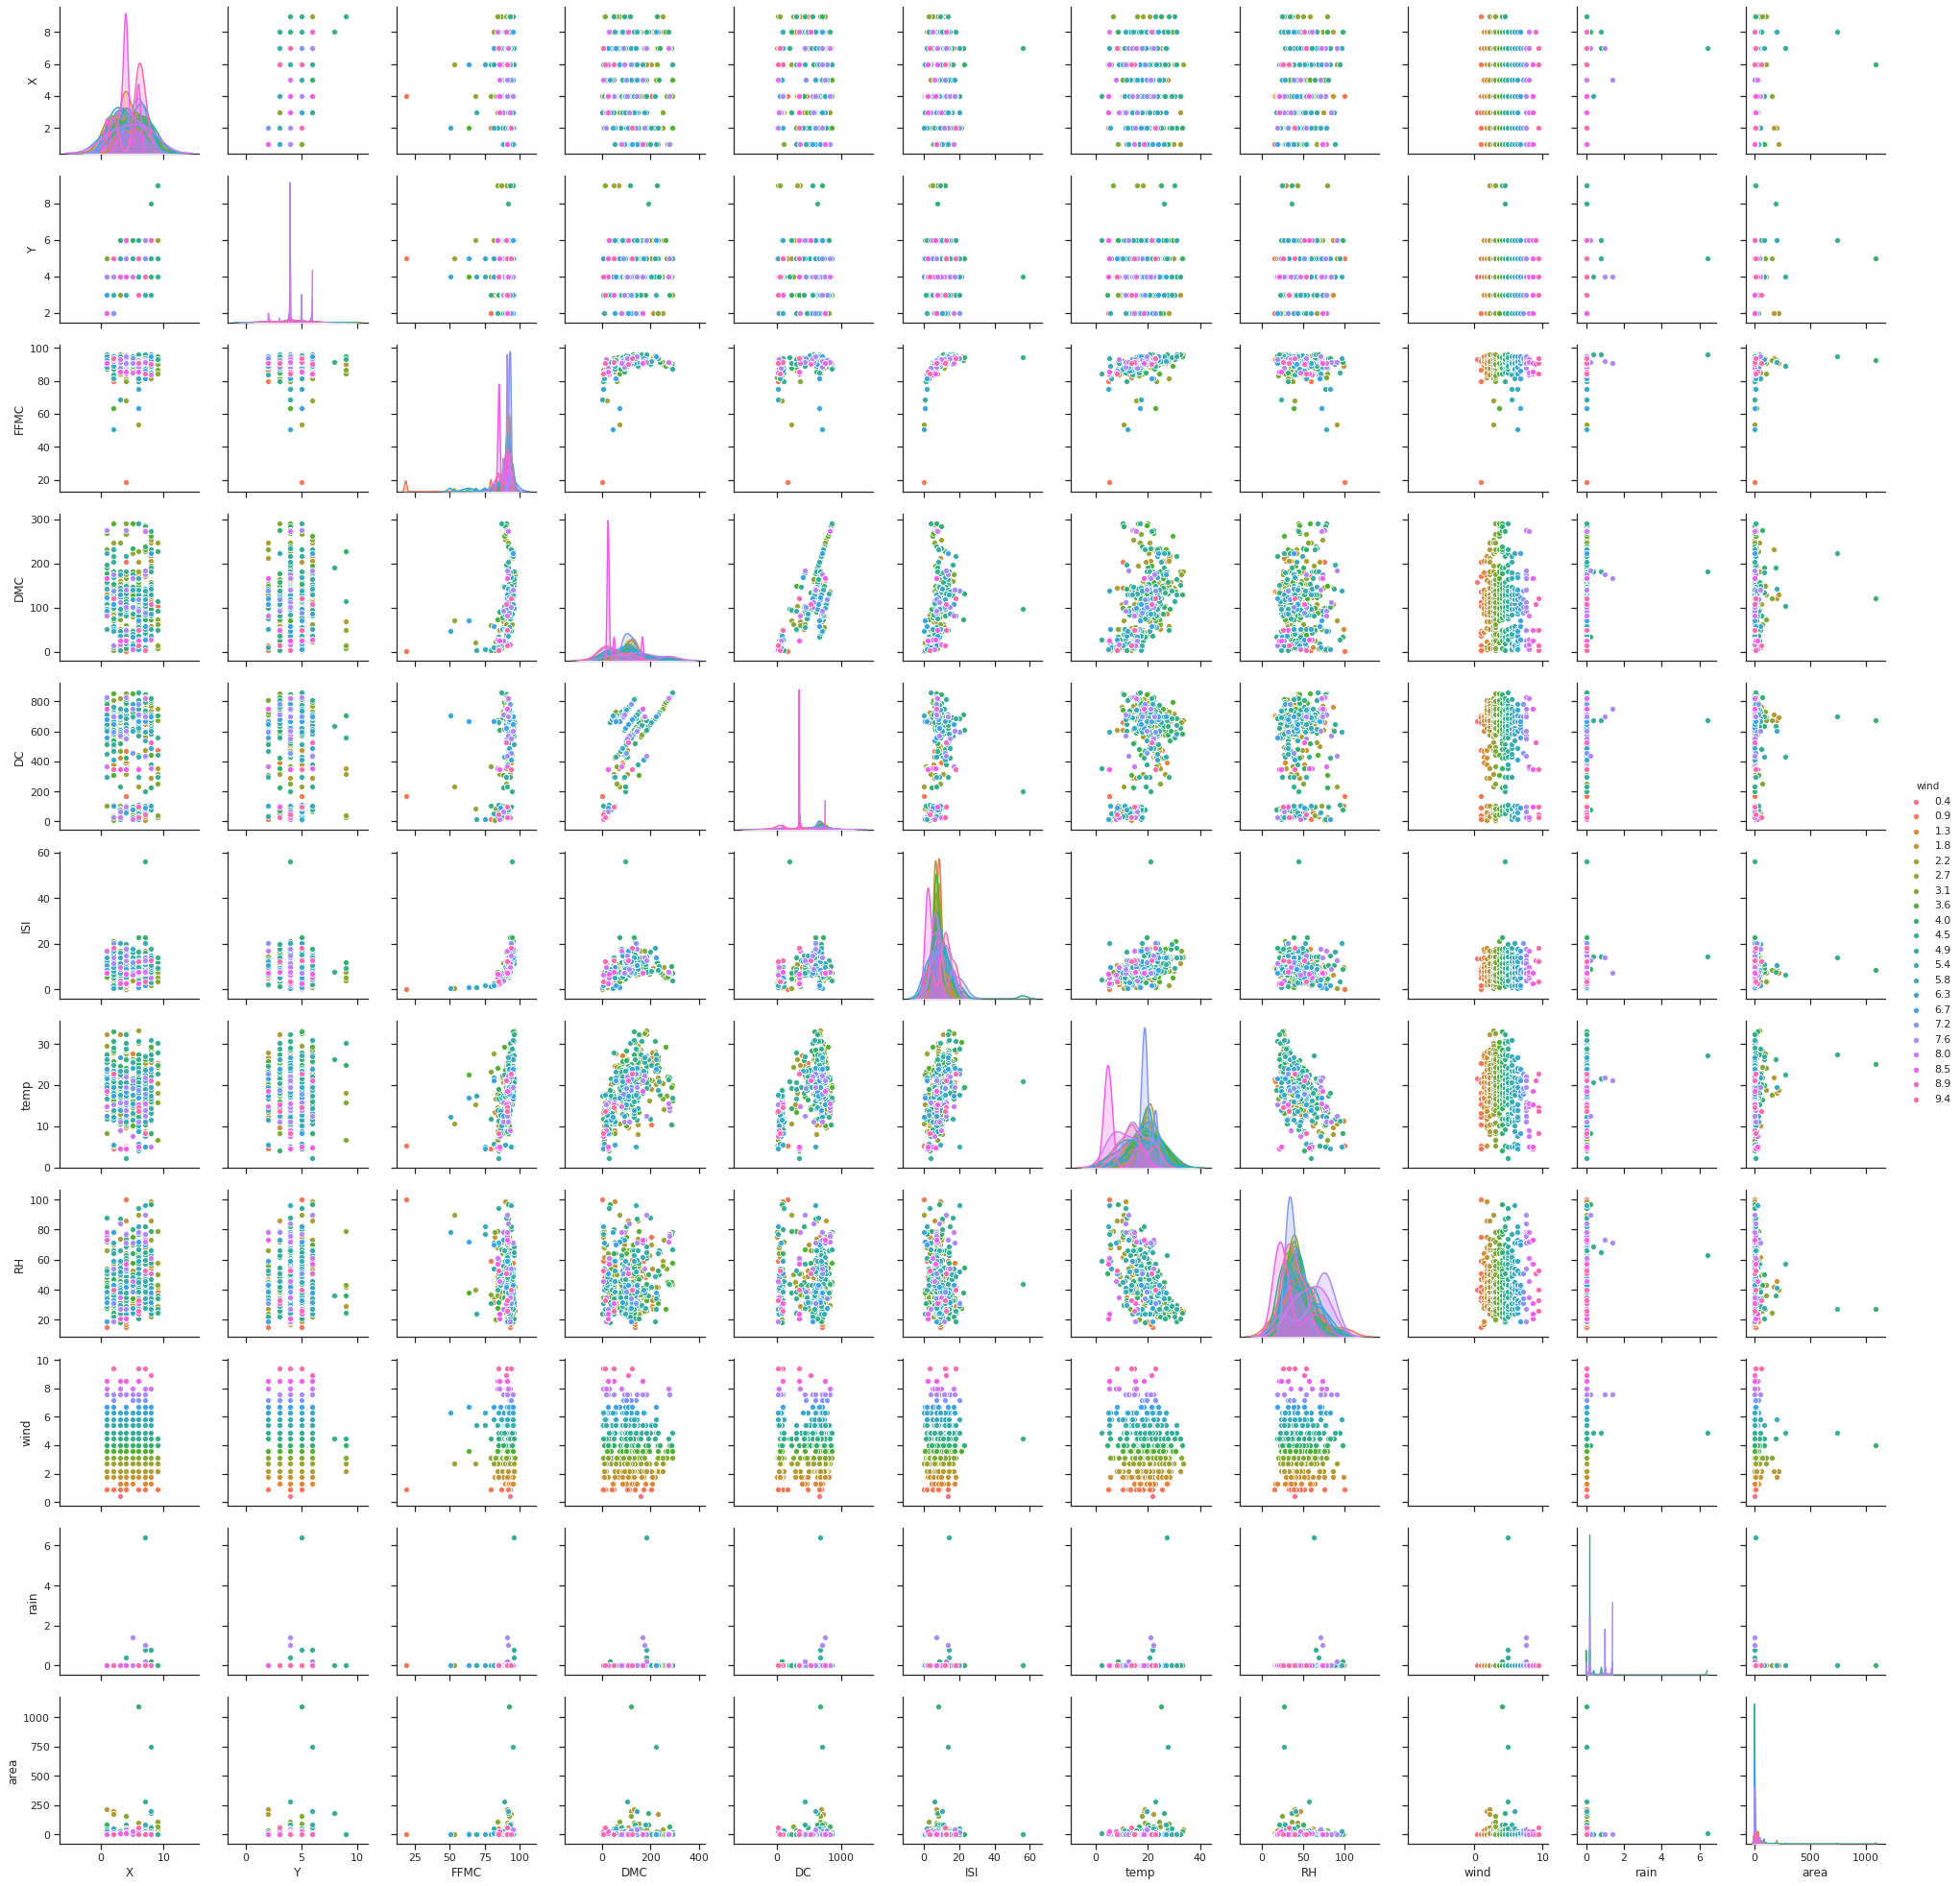

In [0]:
# attempt to change palette
# failed....try again!
sns.pairplot(forest,hue='wind', palette='husl')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


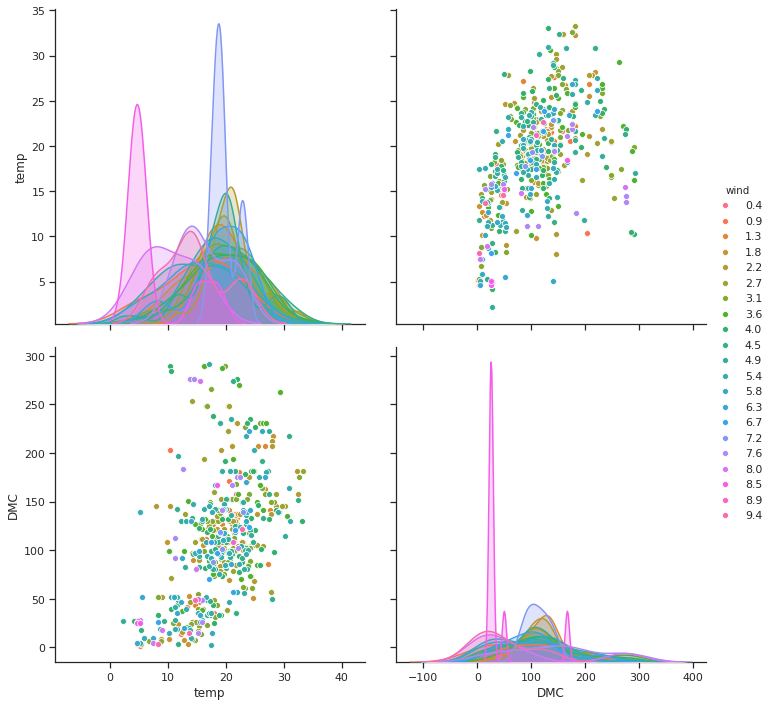

In [0]:
#plot speacific graphs of wind levels when variable 'temp' and 'DMC' are being considered
# graph size increased by size
sns.pairplot(forest,hue='wind',vars=['temp','DMC'], size=5)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


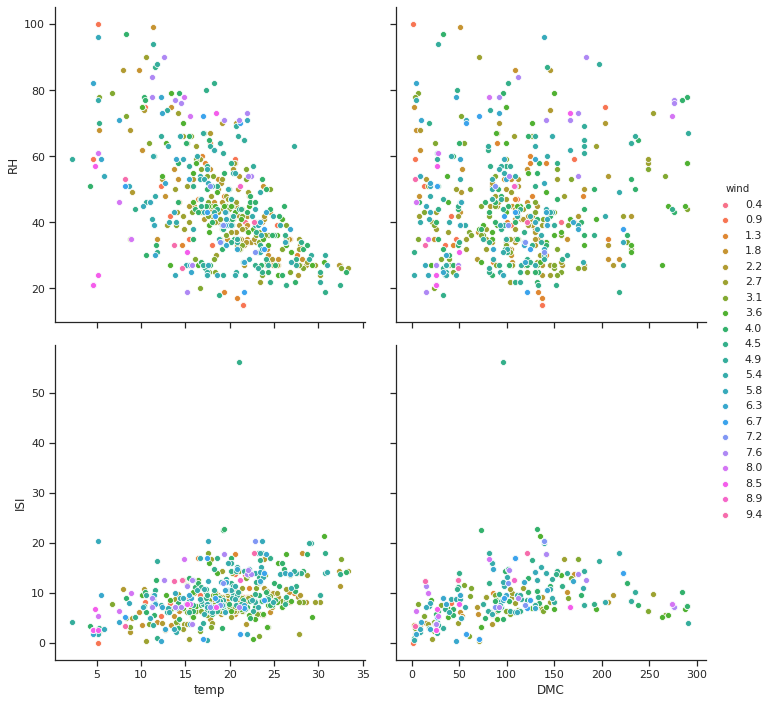

In [0]:
# use a specific graph type; scatter plot in this case
# also specify which variables are in the x and y axis
sns.pairplot(forest,hue='wind',x_vars=['temp','DMC'],y_vars=['RH','ISI'],size=5)

In [0]:
# turn some of the continuous variables into categorical variables by
# binning the values using:
# DMC - DMC index from the FWI system: 1.1 to 291.3 // 
    # 1.1 - 50, 50.1 - 100, 100.1 - 150, 150.1 - 200, 200.1 - 250
    # 250.1-300
bins = [50, 100, 150, 200, 250, 300]

In [0]:
forest.head(40)

In [0]:
category_names = ['A', 'B', 'C', 'D', 'E']

In [0]:
# use cut function to create the categories of DMC column values 
forest['dmc_categories'] = pd.cut(forest.DMC,
                                  bins = [0, 100, 150, 200, 250, 300], labels = 
                                  ['A', 'B', 'C','D', 'E'])

In [0]:
forest['dmc_categories']

0      A
1      A
2      A
3      A
4      A
      ..
512    A
513    A
514    A
515    B
516    A
Name: dmc_categories, Length: 517, dtype: category
Categories (5, object): [A < B < C < D < E]

In [0]:
# use qcut to create 
forest['dmc_qcategories'] = pd.qcut(forest.DMC, 
                                    5, labels = ['A', 'B', 'C', 'D', 'E'])

In [0]:
# view table for new categorical data
forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dmc_categories,dmc_qcategories
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,A,A
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,A,A
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,A,A
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,A,A
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,A,B
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,A,B
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,A,B
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,B,D


In [0]:
# create a cross tabs to compare the binned variable against each other
pd.crosstab(forest['dmc_categories'], forest['dmc_qcategories'])

dmc_qcategories,A,B,C,D,E
dmc_categories,,,,,
A,105,104,19,0,0
B,0,0,86,98,0
C,0,0,0,1,53
D,0,0,0,0,34
E,0,0,0,0,17


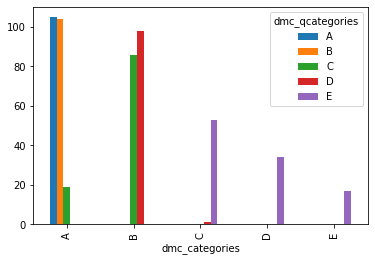

In [0]:
# create a plot of the cross tab
dmc_results = pd.crosstab(forest['dmc_categories'], forest['dmc_qcategories'])
dmc_results.plot(kind='bar');